<a href="https://colab.research.google.com/github/mango766/ml_learning/blob/main/Titanic%E6%95%B0%E6%8D%AE%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

泰坦尼克数据处理

In [2]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"


def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()    

In [3]:
!pwd

/content


In [4]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [5]:
train_data = load_titanic_data('train.csv')
test_data = load_titanic_data('test.csv')

In [6]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


PassengerId：每位乘客的唯一标识符幸存：这是目标，0 表示乘客没有幸存，而 1 表示他/她幸存。

Pclass：乘客舱。

姓名、性别、年龄：不言自明

SibSp：泰坦尼克号上乘客有多少兄弟姐妹和配偶。

Parch：泰坦尼克号上有多少乘客的孩子和父母。

票：票号票价：支付的价格（以英镑计）

客舱：乘客的客舱号码

登船：乘客登上泰坦尼克号的地方

Embarked 属性告诉我们乘客在哪里登船：C=瑟堡，Q=皇后镇，S=南安普顿

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data[train_data['Sex']=='female']['Age'].median()

27.0

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


建立数值预处理管道

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),    
])



独热器分类。建立类别分类管道

In [12]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

总预处理管道

In [13]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

num_attribs = ['Age', 'SibSp',	'Parch', 'Fare']
cat_attribs = ['Pclass', 'Sex', 'Embarked']

preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [45]:
X_train = preprocessing_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs]
)
X_train

array([[-0.50244517,  0.05915988,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78684529,  0.05915988,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.48885426, -0.56097483,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.17626324,  1.29942929,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04438104, -0.56097483,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.49237783, -0.56097483,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
y_train = train_data['Survived']

训练分类器

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 100, random_state=42)

forest_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
X_test = preprocessing_pipeline.fit_transform(
    test_data[num_attribs + cat_attribs]
)

In [18]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
y_pred = forest_clf.predict(X_test)

In [47]:
from sklearn.model_selection import cross_val_score
forest_score = cross_val_score(forest_clf, X_train, y_train, cv = 10)
forest_score.mean()

0.818227215980025

准确率81%，还不错

试试SVC

In [48]:
from sklearn.svm import SVC

svm_clf = SVC(gamma = 'auto')
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv = 10)
svm_scores.mean()

0.8182022471910113

箱线图

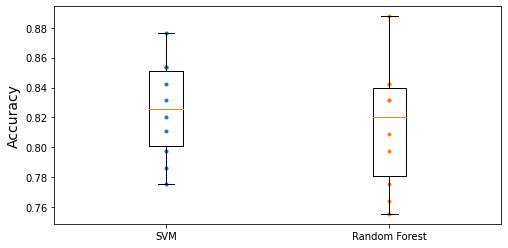

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_score, ".")
plt.boxplot([svm_scores, forest_score], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)

plt.show()

随机森林分类器在 10 次折叠中的一个上获得了非常高的分数，但总体而言，它的平均分数较低，并且散布较大，因此看起来 SVM 分类器更容易​​泛化。

创建年龄段，以及独自旅行类别

In [28]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [29]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [30]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,15.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,15.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,15.0,0


In [33]:
num_attribs = ['Fare','RelativesOnboard']
cat_attribs = ['Pclass', 'Sex', 'Embarked', 'AgeBucket']

preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

X_train2 = preprocessing_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs]
)


X_train2

array([[-0.50244517,  0.05915988,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78684529,  0.05915988,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.48885426, -0.56097483,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.17626324,  1.29942929,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04438104, -0.56097483,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.49237783, -0.56097483,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
y_train2 = train_data['Survived']

In [40]:
forest_clf.fit(X_train2, y_train2)
froest_scores2 = cross_val_score(forest_clf, X_train2, y_train2, cv = 10)


In [41]:
froest_scores2.mean()

0.818227215980025

In [43]:
svm_scores2 = cross_val_score(svm_clf, X_train2, y_train2, cv = 10)
svm_scores2.mean()

0.8182022471910113